In [ ]:
# @title NO COMPRESSION

import numpy as np
import os

all_temperatures = np.loadtxt("/content/drive/MyDrive/temp.txt", delimiter='\t')
temperatures = all_temperatures.T
print(all_temperatures.shape)
# Remove the last 8 measurements from each row
temperatures = temperatures[:, :-8]
print(temperatures.shape)
#file for storing
# Create a list of lists in the desired format
formatted_temperatures = []
for i in range(48):
    row = list(temperatures[i])
   # formatted_row = "{" + ", ".join(map(str, row)) + "}"  #keep all decimals
   # formatted_row = "{" + ", ".join([f'{x:.3f}'.rstrip('0').rstrip('.') for x in row]) + "}" #keep all decimals
    formatted_row = "{" + ", ".join([f'{int(x * 100):.0f}' for x in row]) + "}" #remove decimal
    formatted_temperatures.append(formatted_row)

# Combine all rows into a single string
content = "{" + ",\n".join(formatted_temperatures) + "}"

# Create folders if they don't exist
folder_name = f"Temp Measurements"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

raw_folder_name = f" DATA"
if not os.path.exists(os.path.join(folder_name, raw_folder_name)):
    os.makedirs(os.path.join(folder_name, raw_folder_name))

file_name = f"TEMP DATA.txt"

# Write the content to the file
with open(os.path.join(folder_name, raw_folder_name, file_name), 'w+') as f:
    f.write(content)

print("Data has been formatted and saved.")


(632, 48)
(48, 624)
Data has been formatted and saved.


In [ ]:
# @title DFT COMPRESSION
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler


# Load the temperature data
all_temperatures = np.loadtxt("/content/drive/MyDrive/temp.txt", delimiter='\t')

# Remove the last 8 measurements from each row
temperatures = all_temperatures.T[:, :-8]

# # Initialize the compressed data array with the correct shape
compressed_subset_data = np.zeros((48, 78))



for i in range(48):
    j = 0
    k = 0
    count = 0
    while j < 624:
        # Compute abs DFT of each row
        dft_subset_data = np.fft.fft(temperatures[i, j:j + 16])
        # Sort the DFT coefficients along each row by their magnitude
        sorted_indices = np.argsort(-np.abs(dft_subset_data))[:2]
        sorted_dft_subset_data = dft_subset_data[sorted_indices]
        # Keep top 8 coefficients
        compressed_subset_data[i,k:k + 2] = sorted_dft_subset_data

        # Reconstruct the compressed dataset
        #compressed_subset_data[i,k:k + 4] = np.fft.ifft(top_dft_subset_data, 4).real
        j = j + 16
        k = k + 2
print(compressed_subset_data.shape)




# Create a list of lists in the desired format
formatted_temperatures = []
for i in range(48):
    row = list(compressed_subset_data[i])
   # formatted_row = "{" + ", ".join(map(str, row)) + "}"  #keep all decimals
   # formatted_row = "{" + ", ".join([f'{x:.3f}'.rstrip('0').rstrip('.') for x in row]) + "}" #keep all decimals
    formatted_row = "{" + ", ".join([f'{int(x * 1000)}' for x in row]) + "}" #remove decimal
    formatted_temperatures.append(formatted_row)

# Combine all rows into a single string
content = "{" + ",\n".join(formatted_temperatures) + "}"

# Create folders if they don't exist
folder_name = f"Temp Measurements"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

raw_folder_name = f" DATA"
if not os.path.exists(os.path.join(folder_name, raw_folder_name)):
    os.makedirs(os.path.join(folder_name, raw_folder_name))

file_name = f"DFT TEMP DATA .txt"

# Write the content to the file
with open(os.path.join(folder_name, raw_folder_name, file_name), 'w+') as f:
    f.write(content)

print("Data has been formatted and saved.")


(48, 78)
Data has been formatted and saved.


<ipython-input-2-afd9f872562b>:29: ComplexWarning: Casting complex values to real discards the imaginary part
  compressed_subset_data[i,k:k + 2] = sorted_dft_subset_data


In [ ]:
# @title DCT COMPRESSION
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.fft import fft, dct
import pywt
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages
import os
from sklearn.metrics.cluster import adjusted_rand_score
from scipy.fftpack import idct


# Load the temperature data
all_temperatures = np.loadtxt("/content/drive/MyDrive/temp.txt", delimiter='\t')

# Remove the last 8 measurements from each row
temperatures = all_temperatures.T[:, :-8]

# # Initialize the compressed data array with the correct shape
compressed_subset_data = np.zeros((48, 78))



for i in range(48):
    j = 0
    k = 0
    count = 0
    while j < 624:
        # Compute abs DFT of each row
        dct_subset_data = dct(temperatures[i, j:j + 16])
        # Sort the DFT coefficients along each row by their magnitude
        sorted_indices = np.argsort(-np.abs(dct_subset_data))[:2]
        sorted_dct_subset_data = dct_subset_data[sorted_indices]
        # Keep top 8 coefficients
        compressed_subset_data[i,k:k + 2] = sorted_dct_subset_data
        j = j + 16
        k = k + 2
print(compressed_subset_data.shape)




# Create a list of lists in the desired format
formatted_temperatures = []
for i in range(48):
    row = list(compressed_subset_data[i])
   # formatted_row = "{" + ", ".join(map(str, row)) + "}"  #keep all decimals
   # formatted_row = "{" + ", ".join([f'{x:.3f}'.rstrip('0').rstrip('.') for x in row]) + "}" #keep all decimals
    formatted_row = "{" + ", ".join([f'{int(x * 1000)}' for x in row]) + "}" #remove decimal
    formatted_temperatures.append(formatted_row)

# Combine all rows into a single string
content = "{" + ",\n".join(formatted_temperatures) + "}"

# Create folders if they don't exist
folder_name = f"Temp Measurements"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

raw_folder_name = f" DATA"
if not os.path.exists(os.path.join(folder_name, raw_folder_name)):
    os.makedirs(os.path.join(folder_name, raw_folder_name))

file_name = f"DCT TEMP DATA .txt"

# Write the content to the file
with open(os.path.join(folder_name, raw_folder_name, file_name), 'w+') as f:
    f.write(content)

print("Data has been formatted and saved.")


(48, 78)
Data has been formatted and saved.


In [ ]:
# @title DWT COMPRESSION
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.fft import fft, dct
import pywt
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages
import os
from sklearn.metrics.cluster import adjusted_rand_score
from scipy.fftpack import idct


# Load the temperature data
all_temperatures = np.loadtxt("/content/drive/MyDrive/temp.txt", delimiter='\t')

# Remove the last 8 measurements from each row
temperatures = all_temperatures.T[:, :-8]

# # Initialize the compressed data array with the correct shape
compressed_subset_data = np.zeros((48, 78))



for i in range(48):
    j = 0
    k = 0
    count = 0
    while j < 624:

        # Compute abs DFT of each row
        cA, cD = pywt.dwt(temperatures[i, j:j + 16],'db1')
        # Sort the DFT coefficients along each row by their magnitude
        # Sort
        sorted_cA_subset_data = np.zeros_like(cA) #initialize storage array
        sorted_indices = np.argsort(-np.abs(cA))[:2]
        sorted_cA_subset_data = cA[sorted_indices]
        # Perform inverse DWT to restore the row
        compressed_subset_data[i,k:k + 2] = sorted_cA_subset_data

        j = j + 16
        k = k + 2
print(compressed_subset_data.shape)




# Create a list of lists in the desired format
formatted_temperatures = []
for i in range(48):
    row = list(compressed_subset_data[i])
   # formatted_row = "{" + ", ".join(map(str, row)) + "}"  #keep all decimals
   # formatted_row = "{" + ", ".join([f'{x:.3f}'.rstrip('0').rstrip('.') for x in row]) + "}" #keep all decimals
    formatted_row = "{" + ", ".join([f'{int(x * 1000)}' for x in row]) + "}" #remove decimal
    formatted_temperatures.append(formatted_row)

# Combine all rows into a single string
content = "{" + ",\n".join(formatted_temperatures) + "}"

# Create folders if they don't exist
folder_name = f"Temp Measurements"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

raw_folder_name = f" DATA"
if not os.path.exists(os.path.join(folder_name, raw_folder_name)):
    os.makedirs(os.path.join(folder_name, raw_folder_name))

file_name = f"DWT TEMP DATA .txt"

# Write the content to the file
with open(os.path.join(folder_name, raw_folder_name, file_name), 'w+') as f:
    f.write(content)

print("Data has been formatted and saved.")


(48, 78)
Data has been formatted and saved.


In [ ]:
!pip install pyts
!pip install --upgrade pyts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 26.2 MB/s eta 0:00:00


In [ ]:
# @title PAA COMPRESSION
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.impute import SimpleImputer
import sys
import pywt
from sklearn.preprocessing import LabelEncoder
np.set_printoptions(threshold=sys.maxsize)
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages
import os
import matplotlib.pyplot as plt
from pyts.approximation import PiecewiseAggregateApproximation as PAA
from scipy.fftpack import idct


# Load the temperature data
all_temperatures = np.loadtxt("/content/drive/MyDrive/temp.txt", delimiter='\t')

# Remove the last 8 measurements from each row
temperatures = all_temperatures.T[:, :-8]

# # Initialize the compressed data array with the correct shape
compressed_subset_data = np.zeros((48,78))



for i in range(48):
    paa = PAA(window_size = 8)
    compressed_subset_data = paa.fit_transform(temperatures)
print(compressed_subset_data.shape)




# Create a list of lists in the desired format
formatted_temperatures = []
for i in range(48):
    row = list(compressed_subset_data[i])
   # formatted_row = "{" + ", ".join(map(str, row)) + "}"  #keep all decimals
   # formatted_row = "{" + ", ".join([f'{x:.3f}'.rstrip('0').rstrip('.') for x in row]) + "}" #keep all decimals
    formatted_row = "{" + ", ".join([f'{int(x * 1000)}' for x in row]) + "}" #remove decimal
    formatted_temperatures.append(formatted_row)

# Combine all rows into a single string
content = "{" + ",\n".join(formatted_temperatures) + "}"

# Create folders if they don't exist
folder_name = f"Temp Measurements"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

raw_folder_name = f" DATA"
if not os.path.exists(os.path.join(folder_name, raw_folder_name)):
    os.makedirs(os.path.join(folder_name, raw_folder_name))

file_name = f"PAA TEMP DATA .txt"

# Write the content to the file
with open(os.path.join(folder_name, raw_folder_name, file_name), 'w+') as f:
    f.write(content)

print("Data has been formatted and saved.")


(48, 78)
Data has been formatted and saved.


In [ ]:
# @title MY COMPRESSION
import numpy as np
import os

def generate_random_vectors(n, r):
    random_vectors = np.random.normal(0, 1, size=(r, n))
    return random_vectors

def MINE(data, R, R_inv):
    prod = np.matmul(data, R)
    bitmap = np.where(prod < 0, 0, 1)
    return bitmap

# Load the temperature data (replace with your data file)
all_temperatures = np.loadtxt("/content/drive/MyDrive/temp.txt", delimiter='\t')

# Remove the last 8 measurements from each row
temperatures = all_temperatures.T[:, :-8]

# Initialize random vectors and their inverse
n = 32 * int(16 / 8)  # Dimension of each random vector
r = 16  # Number of random vectors to generate/rows
R = generate_random_vectors(n, r)
R_inv = np.linalg.pinv(R)

# Initialize the compressed data array shape
compressed_subset_data = np.empty((48, 78), dtype=object)

# Process each row of temperature data
for i in range(48):
    j = 0
    k = 0
    while j < 624:
        row = temperatures[i, j:j + 16]
        store_bitmap = MINE(row, R, R_inv)

        for m in range(0, 64, 32):
            # Extract a chunk of 32 values
            chunk = store_bitmap[m:m + 32]

            # Convert the chunk to a binary string
            chunk_binary = ''.join(map(str, chunk))

            # Store the binary string in compressed_subset_data
            compressed_subset_data[i, k] = chunk_binary
            k += 1
        j += 16
print(compressed_subset_data.shape)
# Create a list of lists in the desired format
formatted_temperatures = []
for i in range(48):
    row = list(compressed_subset_data[i])
   # formatted_row = "{" + ", ".join(map(str, row)) + "}"  #keep all decimals
   # formatted_row = "{" + ", ".join([f'{x:.3f}'.rstrip('0').rstrip('.') for x in row]) + "}" #keep all decimals
    formatted_row = "{0b" + ",0b".join([f'{(x)}' for x in row]) + "}" #remove decimal
    formatted_temperatures.append(formatted_row)

# Combine all rows into a single string
content = "{" + ",\n".join(formatted_temperatures) + "}"

# Create folders if they don't exist
folder_name = f"Temp Measurements"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

raw_folder_name = f" DATA"
if not os.path.exists(os.path.join(folder_name, raw_folder_name)):
    os.makedirs(os.path.join(folder_name, raw_folder_name))

file_name = f"MY COMP TEMP DATA .txt"

# Write the content to the file
with open(os.path.join(folder_name, raw_folder_name, file_name), 'w+') as f:
    f.write(content)

print("Data has been formatted and saved.")


(48, 78)
Data has been formatted and saved.


In [ ]:
import re

#PASTE TOSSIM CONSOLE RESULTS BELOW
data = """
////////////////////////////
BYTE COUNTER FOR NODE[43]: CL:336 , CLN:24, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[37]: CL:352 , CLN:40, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[13]: CL:344 , CLN:32, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[31]: CL:432 , CLN:120, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[19]: CL:448 , CLN:136, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[25]: CL:360 , CLN:48, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[1]: CL:424 , CLN:112, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[7]: CL:392 , CLN:80, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[32]: CL:328 , CLN:16, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[20]: CL:328 , CLN:16, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[2]: CL:352 , CLN:40, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[14]: CL:368 , CLN:56, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[26]: CL:368 , CLN:56, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[38]: CL:360 , CLN:48, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[44]: CL:336 , CLN:24, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[8]: CL:392 , CLN:80, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[33]: CL:344 , CLN:32, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[27]: CL:376 , CLN:64, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[15]: CL:344 , CLN:32, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[39]: CL:312 , CLN:0, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[3]: CL:328 , CLN:16, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[9]: CL:376 , CLN:64, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[45]: CL:344 , CLN:32, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[21]: CL:344 , CLN:32, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[22]: CL:328 , CLN:16, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[16]: CL:312 , CLN:0, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[10]: CL:344 , CLN:32, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[28]: CL:336 , CLN:24, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[46]: CL:328 , CLN:16, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[4]: CL:336 , CLN:24, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[34]: CL:344 , CLN:32, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[40]: CL:320 , CLN:8, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[23]: CL:392 , CLN:80, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[29]: CL:392 , CLN:80, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[47]: CL:320 , CLN:8, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[35]: CL:400 , CLN:88, FAILS:0
////////////////////////////
////////////////////////////
BYTE COUNTER FOR NODE[41]: CL:352 , CLN:40, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[11]: CL:392 , CLN:80, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[17]: CL:336 , CLN:24, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[5]: CL:392 , CLN:80, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[18]: CL:352 , CLN:40, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[24]: CL:384 , CLN:72, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[30]: CL:344 , CLN:32, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[42]: CL:328 , CLN:16, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[12]: CL:360 , CLN:48, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[36]: CL:360 , CLN:48, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[48]: CL:360 , CLN:48, FAILS:0
////////////////////////////

////////////////////////////
BYTE COUNTER FOR NODE[6]: CL:400 , CLN:88, FAILS:0
////////////////////////////

###############################
BYTE COUNTER FOR NODE[49]:  B:2120, BN:248,LOST:0
############################

###############################
BYTE COUNTER FOR NODE[50]:  B:2120, BN:248,LOST:0
############################

###############################
BYTE COUNTER FOR NODE[51]:  B:2088, BN:216,LOST:0
############################

###############################
BYTE COUNTER FOR NODE[52]:  B:2016, BN:144,LOST:0
############################

###############################
BYTE COUNTER FOR NODE[53]:  B:2280, BN:408,LOST:0
############################

###############################
BYTE COUNTER FOR NODE[54]:  B:2072, BN:200,LOST:0
############################

###############################
BYTE COUNTER FOR NODE[55]:  B:2216, BN:344,LOST:0
############################

////////////////////////////
BYTE COUNTER FOR NODE[57]: CL:0 , CLN:0, FAILS:0
////////////////////////////

###############################
BYTE COUNTER FOR NODE[56]:  B:2112, BN:240,LOST:0
############################
"""

# Extract CL values separated by '+'
cl_values = re.findall(r'CL:(\d+)', data)
cl_values_str = '+'.join(cl_values)

# Extract CLN values
cln_values = re.findall(r'CLN:(\d+)', data)
cln_values_str = '+'.join(cln_values)

# Extract B values
b_values = re.findall(r'B:(\d+)', data)
b_values_str = '+'.join(b_values)

# Extract BN values
bn_values = re.findall(r'BN:(\d+)', data)
bn_values_str = '+'.join(bn_values)

# Extract LOST values
lost_values = re.findall(r'LOST:(\d+)', data)
lost_values_str = '+'.join(lost_values)

# Split the string by '+' and convert the parts to integers
numbers_list = list(map(int, cl_values_str.split('+')))
total_sum = sum(numbers_list)
print("CL:", total_sum)

# Split the string by '+' and convert the parts to integers
numbers_list1 = list(map(int, cln_values_str.split('+')))
total_sum1 = sum(numbers_list1)
print("CLN:", total_sum1)
print("DIFF:", total_sum - total_sum1)

# Split the string by '+' and convert the parts to integers
numbers_list2 = list(map(int, b_values_str.split('+')))
total_sum2 = sum(numbers_list2)
print("B:", total_sum2)

# Split the string by '+' and convert the parts to integers
numbers_list3 = list(map(int, bn_values_str.split('+')))
total_sum3 = sum(numbers_list3)
print("BN:", total_sum3)
print("DIFF:", total_sum - total_sum1)
# Split the string by '+' and convert the parts to integers
numbers_list4 = list(map(int, lost_values_str.split('+')))
total_sum4 = sum(numbers_list4)
print("LOST:", total_sum4)


CL: 17200
CLN: 2224
DIFF: 14976
B: 17024
BN: 2048
DIFF: 14976
LOST: 0


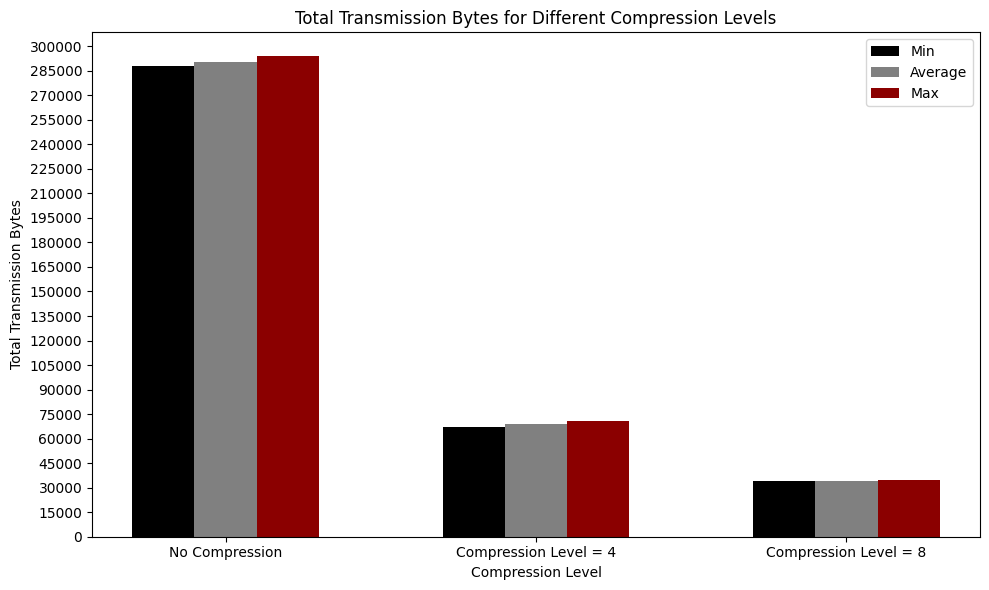

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

# Data
compression_levels = ["No Compression", "Compression Level = 4", "Compression Level = 8"]
min_totals = [287680, 67408, 34040]
max_totals = [293824, 70480, 34480]
avg_totals = [290560, 69178.6, 34248]


bar_colors = ['black', 'grey', 'darkred']

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(compression_levels))

plt.bar(index - bar_width, min_totals, bar_width, label='Min', color=bar_colors[0])
plt.bar(index, avg_totals , bar_width, label='Average', color=bar_colors[1])
plt.bar(index + bar_width, max_totals , bar_width, label='Max', color=bar_colors[2])

plt.xlabel('Compression Level')
plt.ylabel('Total Transmission Bytes')
plt.title('Total Transmission Bytes for Different Compression Levels')


ax = plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(15000))

plt.xticks(index, compression_levels)
plt.legend()

plt.tight_layout()
plt.show()





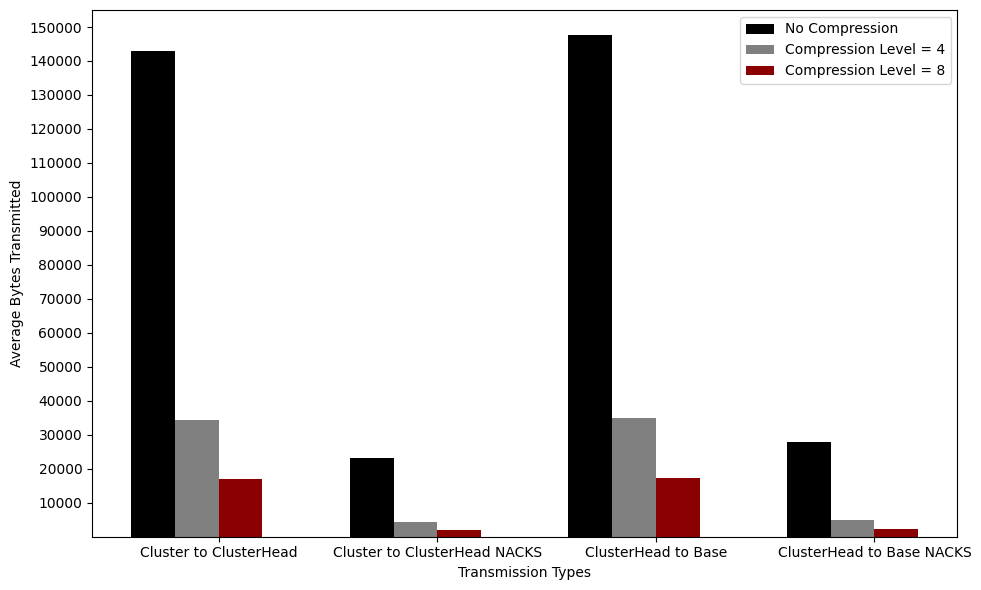

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

#types
transmission_types = ["Cluster to ClusterHead", "Cluster to ClusterHead NACKS", "ClusterHead to Base", "ClusterHead to Base NACKS"]

# Average values
averages_no_compression = [142933, 23125, 147626, 27840]
averages_bitmap_4 = [34218, 4266, 34960, 5008]
averages_bitmap_8 = [16904, 1928, 17344, 2368]

# spacing
width = 0.2
x = np.arange(len(transmission_types))

fig, ax = plt.subplots(figsize=(10, 6))  # Adjustsize

ax.bar(x - 1.5 * width, averages_no_compression, width, label='No Compression', color='black')
ax.bar(x - 0.5 * width, averages_bitmap_4, width, label='Compression Level = 4', color='grey')
ax.bar(x + 0.5 * width, averages_bitmap_8, width, label='Compression Level = 8', color='darkred')

# Set labels
ax.set_xlabel('Transmission Types')
ax.set_ylabel('Average Bytes Transmitted')
#ax.set_title('Average Bits by Transmission Type and Compression Level')

# Use horizontal alignment for X-axis labels and increase spacing between bars
ax.set_xticks(x)
ax.set_xticklabels(transmission_types, rotation=0, ha='center')
ax.legend()

ax.yaxis.set_major_locator(MaxNLocator(integer=True, prune='both', nbins=16))  # Adjust nbins as needed
plt.tight_layout()
plt.show()


Energy drain for transmitting 2324480 bits at a distance of 10 meters: 0.13947 Joules
Energy drain for receiving 2324480 bits: 0.11622 Joules
Total Energy drain 2324480 bits: 0.25569 Joules
-----------------------------------------------------------------
Energy drain for transmitting 553424 bits at a distance of 10 meters: 0.03321 Joules
Energy drain for receiving 553424 bits: 0.02767 Joules
Total Energy drain 553424 bits: 0.25569 Joules
-----------------------------------------------------------------
Energy drain for transmitting 273984 bits at a distance of 10 meters: 0.01644 Joules
Energy drain for receiving 273984 bits: 0.01370 Joules
Total Energy drain 273984 bits: 0.25569 Joules


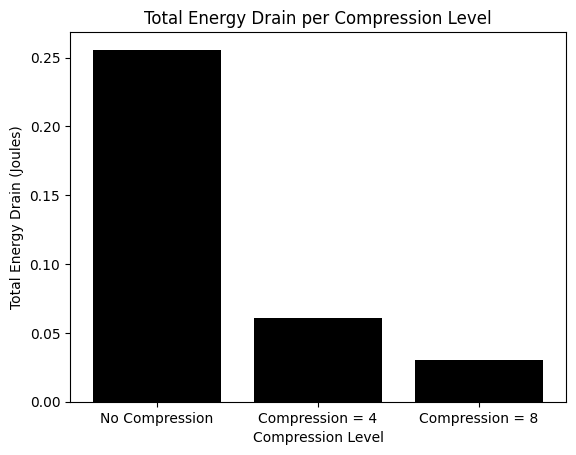

In [ ]:

ETX = 50e-9  # Energy dissipation for transmitter electronics (in Joules/bit)
ERX = 50e-9  # Energy dissipation for receiver electronics (in Joules/bit)
ERF = 100e-12  # Energy dissipation for power amplifier (in Joules/bit/m^2)

# Function to calculate energy drain for transmitting data
def calculate_transmit_energy(b, dist):
    energy_drain = (ETX + ERF * dist**2) * b
    return round(energy_drain, 5)  # Round to 5 decimal places

# Function to calculate energy drain for receiving data
def calculate_receive_energy(b):
    energy_drain = ERX * b
    return round(energy_drain, 5)  # Round to 5 decimal places


b = 290560  * 8  # Turn Bytes to Number of bits
dist = 10  # Distance in meters

transmit_energy = calculate_transmit_energy(b, dist)
receive_energy = calculate_receive_energy(b)
total = transmit_energy + receive_energy

print(f"Energy drain for transmitting {b} bits at a distance of {dist} meters: {transmit_energy:.5f} Joules")
print(f"Energy drain for receiving {b} bits: {receive_energy:.5f} Joules")
print(f"Total Energy drain {b} bits: {total:.5f} Joules")
print(f"-----------------------------------------------------------------")


b_comp4 = 69178  * 8  # Turn Bits to Number of bits

transmit_energy = calculate_transmit_energy(b_comp4, dist)
receive_energy = calculate_receive_energy(b_comp4)
total4 = transmit_energy + receive_energy

print(f"Energy drain for transmitting {b_comp4} bits at a distance of {dist} meters: {transmit_energy:.5f} Joules")
print(f"Energy drain for receiving {b_comp4} bits: {receive_energy:.5f} Joules")
print(f"Total Energy drain {b_comp4} bits: {total:.5f} Joules")
print(f"-----------------------------------------------------------------")

b_comp8 = 34248  * 8  #Turn Bits to Number of bits

transmit_energy = calculate_transmit_energy(b_comp8, dist)
receive_energy = calculate_receive_energy(b_comp8)
total8 = transmit_energy + receive_energy

print(f"Energy drain for transmitting {b_comp8} bits at a distance of {dist} meters: {transmit_energy:.5f} Joules")
print(f"Energy drain for receiving {b_comp8} bits: {receive_energy:.5f} Joules")
print(f"Total Energy drain {b_comp8} bits: {total:.5f} Joules")


import matplotlib.pyplot as plt

compression_types = ["No Compression", "Compression = 4", "Compression = 8"]
total_energy_drain = [total, total4, total8]


plt.bar(compression_types, total_energy_drain, color='black')
plt.xlabel('Compression Level')
plt.ylabel('Total Energy Drain (Joules)')
plt.title('Total Energy Drain per Compression Level')
plt.show()